In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')
df

,Id,Age,Gender,Purchased
0,id1,<25,Male,No
1,id2,<25,Female,No
2,id3,<25,Female,Yes
3,id4,<25,Male,No
4,id5,25+,Male,No
...,...,...,...,...
79995,id79996,<25,Female,No
79996,id79997,<25,Male,No
79997,id79998,<25,Female,No
79998,id79999,<25,Female,No


#синий

In [2]:
df['Purchased'].value_counts('Yes')

,proportion
Purchased,
No,0.831825
Yes,0.168175


In [3]:
df['Purchased'] = df['Purchased'].apply(lambda x: 1 if x == 'Yes' else 0)


In [4]:
# df['Purchased'].value_counts('Yes')
mean_convers_all = df['Purchased'].sum() / 80_000
mean_convers_all

0.168175

In [60]:
mean_convers_1 = []
for _ in range(10_000):
  sp = df.sample(400)
  mean_convers_1.append(sp['Purchased'].mean())

In [52]:
print('среднее приближенное по простой случайной выборке: ',pd.Series(mean_convers_1).mean(), '\nсреднее по ген совокупности:', mean_convers_all)

среднее приближенное по простой случайной выборке:  0.16843125000000003 
среднее по ген совокупности: 0.168175


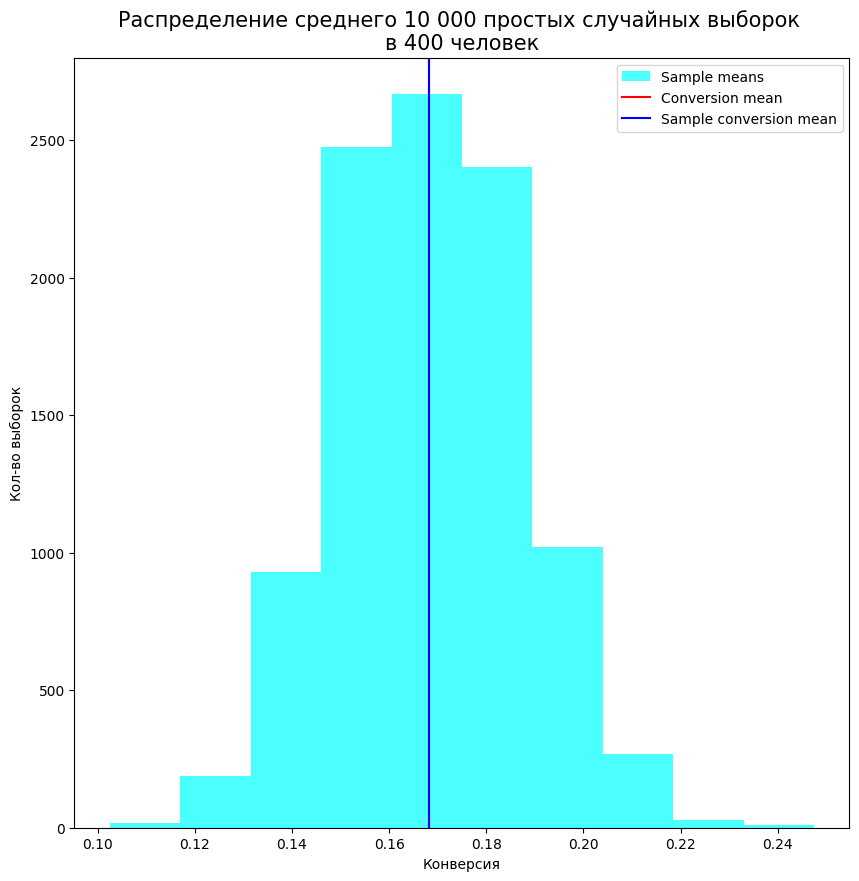

In [61]:
figure(figsize=(10, 10), dpi=100)


plt.hist(mean_convers_1, label = 'Sample means', alpha = 0.7, color = 'cyan')
plt.axvline(mean_convers_all, label = 'Conversion mean', color = 'red')
plt.axvline(pd.Series(mean_convers_1).mean(), label = 'Sample conversion mean', color = 'b')


plt.legend(loc = 'upper right')
plt.title('Распределение среднего 10 000 простых случайных выборок \nв 400 человек', fontsize = 15)
plt.xlabel('Конверсия')
plt.ylabel('Кол-во выборок')
plt.show()

#красный

In [44]:
def stratified_sample(df, strata_col, frac):
    groups = df.groupby(strata_col)
    sample = pd.DataFrame()

    for _, group in groups:
        stratum_sample = group.sample(frac=frac, replace=False)
        sample = pd.concat([sample,stratum_sample])

    return sample

In [45]:
mean_convers_strat = []

for _ in range(1,10_000):
  df_sample = stratified_sample(df, ['Age','Gender'], 400 / 80_000)
  mean_convers_strat.append(df_sample['Purchased'].mean())


In [67]:
print('Простая')
print('среднее приближенное по простой случайной выборке: ',pd.Series(mean_convers_1).mean(), '\nсреднее по ген совокупности:', mean_convers_all)
print('/n')
pd.Series(mean_convers_strat).mean()

Простая
среднее приближенное по простой случайной выборке:  0.1681625 
среднее по ген совокупности: 0.168175
/n


0.16822283732132612

In [69]:
print('simple', pd.Series(mean_convers_1).mean(),   pd.Series(mean_convers_1).std())
print('strat', pd.Series(mean_convers_strat).mean(),   pd.Series(mean_convers_strat).std())

simple 0.1681625 0.01853190996413151
strat 0.16822283732132612 0.018590762789932755


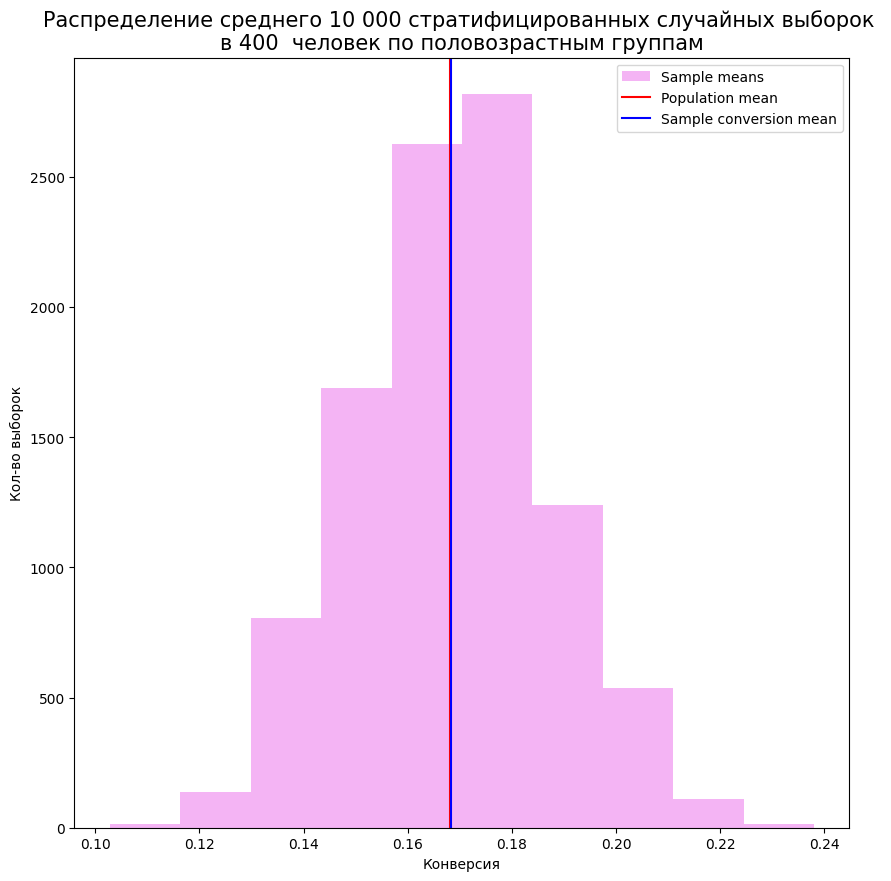

In [63]:
figure(figsize=(10, 10), dpi=100)

plt.hist(mean_convers_strat, label = 'Sample means', alpha = .6, color = 'violet')

plt.axvline(mean_convers_all, label = 'Population mean', color = 'red')
plt.axvline(pd.Series(mean_convers_strat).mean(), label = 'Sample conversion mean', color = 'b')


plt.legend(loc = 'upper right')
plt.title('Распределение среднего 10 000 стратифицированных случайных выборок \nв 400  человек по половозрастным группам', fontsize = 15)
plt.xlabel('Конверсия')
plt.ylabel('Кол-во выборок')
plt.show()

#черный

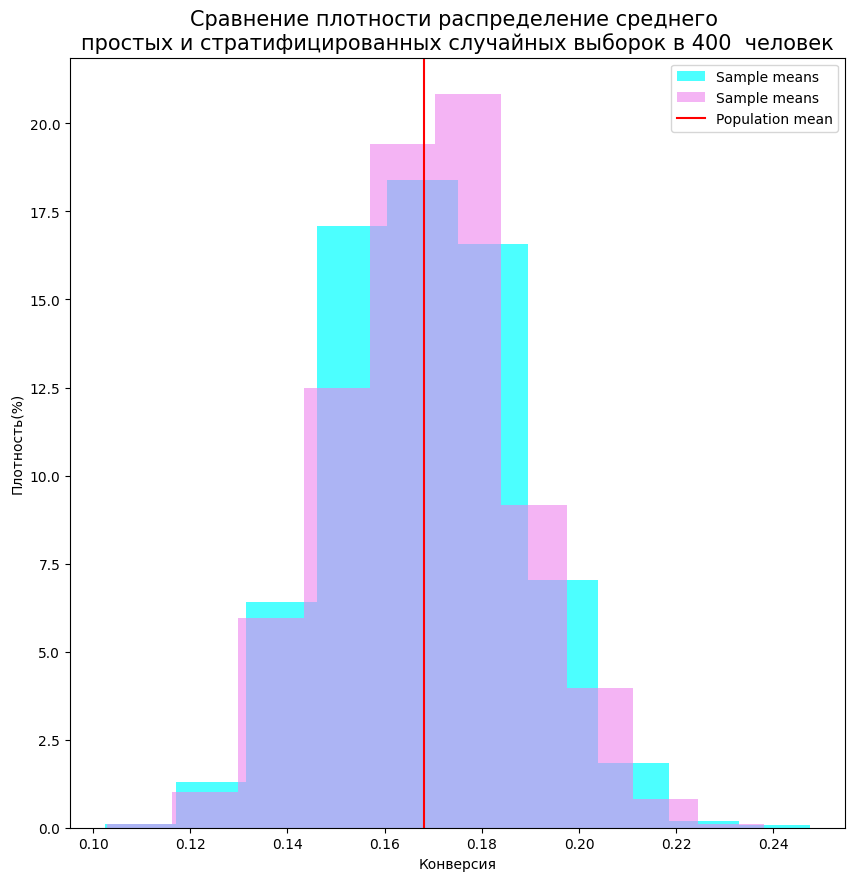

In [66]:
figure(figsize=(10, 10), dpi=100)


plt.hist(mean_convers_1, label = 'Sample means',density = 1, alpha = 0.7, color = 'cyan')
plt.hist(mean_convers_strat, label = 'Sample means',density = 1, alpha = .6, color = 'violet')

plt.axvline(mean_convers_all, label = 'Population mean', color = 'red')

plt.legend(loc = 'upper right')
plt.title('Сравнение плотности распределение среднего \nпростых и стратифицированных случайных выборок в 400  человек', fontsize = 15)
plt.xlabel('Конверсия')
plt.ylabel('Плотность(%)')
plt.show()